In [1]:
from sklearn.manifold import TSNE

import torch
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [2]:
base_dir = '../Data_Generation/Data_files/labeled_points/'
base_fp = base_dir + '../points/sl2_Z_3s.csv'
test_fp = base_dir + 'sl2_Z_3s_test.csv'
train_fp = base_dir + 'sl2_Z_3s_train.csv'

In [3]:
# Load data
df = pd.read_csv(base_fp)
train_df = pd.read_csv(train_fp)
test_df = pd.read_csv(test_fp)

xs_data = pd.read_csv(base_dir + 'sl2_Z_3s_bfs_xtra_small.csv')
s_data = pd.read_csv(base_dir + 'sl2_Z_3s_bfs_small.csv')
m_data = pd.read_csv(base_dir + 'sl2_Z_3s_bfs_medium.csv')
l_data = pd.read_csv(base_dir + 'sl2_Z_3s_bfs_large.csv')
xl_data = pd.read_csv(base_dir + 'sl2_Z_3s_bfs_xtra_large.csv')

In [4]:
# Converting Sized DataFrames to matrices
xs_data = torch.tensor(xs_data.values, dtype=torch.float64)
xs_mats = xs_data[:, :4].reshape(-1, 2, 2)
xs_labels = xs_data[:, 4]

s_data = torch.tensor(s_data.values, dtype=torch.float64)
s_mats = s_data[:, :4].reshape(-1, 2, 2)
s_labels = s_data[:, 4]

m_data = torch.tensor(m_data.values, dtype=torch.float64)
m_mats = m_data[:, :4].reshape(-1, 2, 2)
m_labels = m_data[:, 4]

l_data = torch.tensor(l_data.values, dtype=torch.float64)
l_mats = l_data[:, :4].reshape(-1, 2, 2)
l_labels = l_data[:, 4]

xl_data = torch.tensor(xl_data.values, dtype=torch.float64)
xl_mats = xl_data[:, :4].reshape(-1, 2, 2)
xl_labels = xl_data[:, 4]

In [5]:
# All matrices
matrices_all = torch.tensor(df.values, dtype=torch.float64).reshape(100000, 2, 2)

# Training matrices and labels
train_data = torch.tensor(train_df.values, dtype=torch.float64)
labels_train = train_data[:,-1]
matrices_train = train_data[:,0:-2].reshape(train_data.shape[0], 2, 2)

# Testing matrices and labels
test_data = torch.tensor(test_df.values, dtype=torch.float64)
labels_test = test_data[:,-1]
matrices_test = test_data[:,0:-2].reshape(test_data.shape[0], 2, 2)

# Visualization vectors
basis_vec = torch.tensor([[1, 0]], dtype=torch.float64)
vecs_all = matrices_all.matmul(basis_vec.T)
vecs_train = matrices_train.matmul(basis_vec.T)
vecs_test = matrices_test.matmul(basis_vec.T)
x_train = vecs_train[:, 0]
x_test = vecs_test[:, 0]
y_train = vecs_train[:, 1]
y_test = vecs_test[:, 1]

# Training data masks to zoom plot
train_mask1 = x_train < 500
train_mask2 = x_train > -500
train_mask3 = y_train < 500
train_mask4 = y_train > -500
train_mask = train_mask1 & train_mask2 & train_mask3 & train_mask4

# Testing data mask to zoom plot
test_mask1 = x_test < 500
test_mask2 = x_test > -500
test_mask3 = y_test < 500
test_mask4 = y_test > -500
test_mask = test_mask1 & test_mask2 & test_mask3 & test_mask4

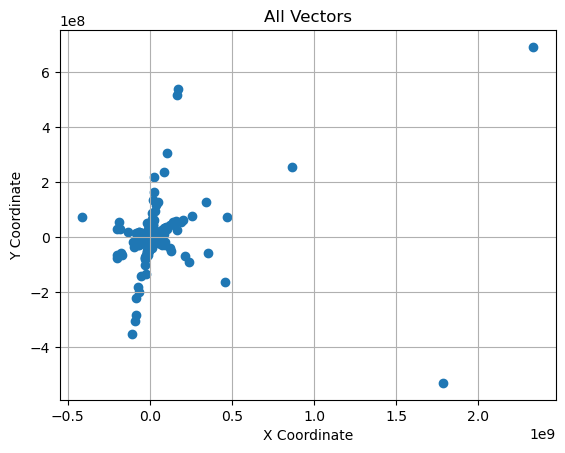

In [6]:
plt.scatter(vecs_all[:, 0], vecs_all[:, 1])
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('All Vectors')
plt.grid(True)
plt.show()

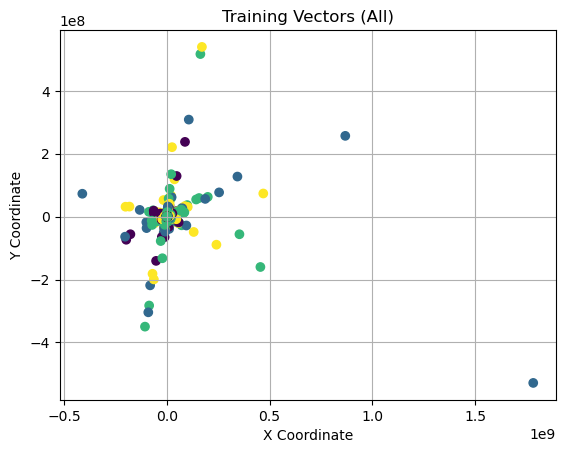

In [7]:
plt.scatter(x_train, y_train, c=labels_train)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Training Vectors (All)')
plt.grid(True)
plt.show()

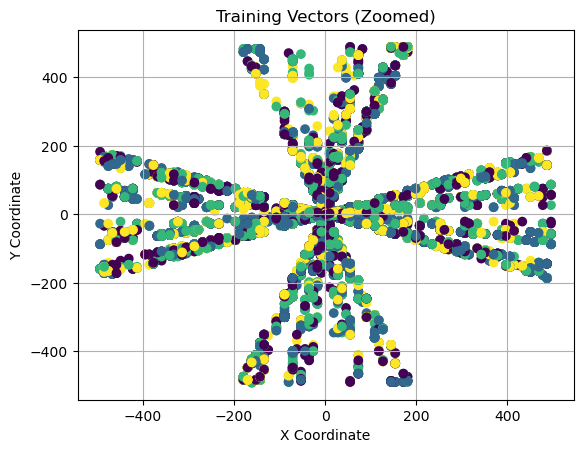

In [8]:

plt.scatter(x_train[train_mask], y_train[train_mask], c=labels_train[train_mask.flatten()])
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Training Vectors (Zoomed)')
plt.grid(True)
plt.show()

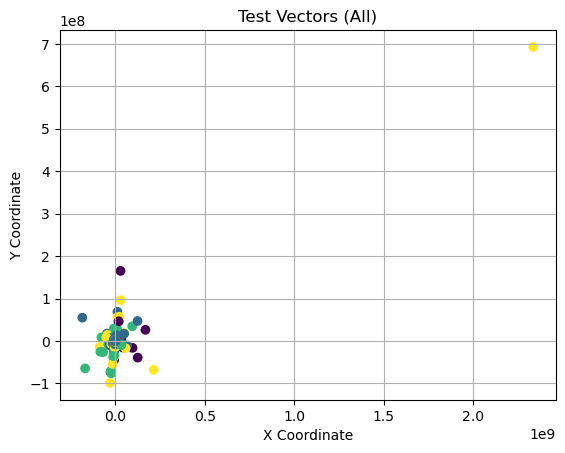

In [9]:
plt.scatter(x_test, y_test, c=labels_test)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Test Vectors (All)')
plt.grid(True)
plt.show()

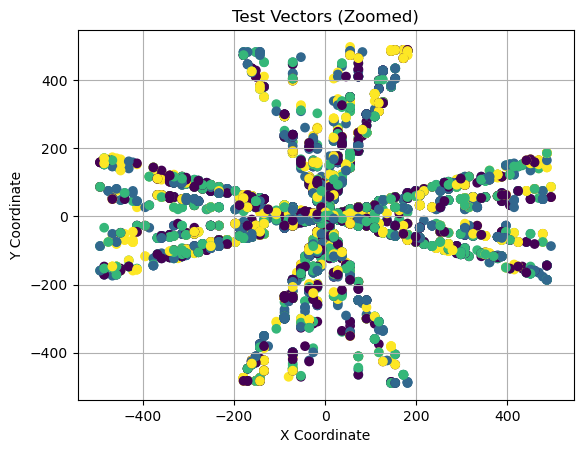

In [10]:
plt.scatter(x_test[test_mask], y_test[test_mask], c=labels_test[test_mask.flatten()])
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Test Vectors (Zoomed)')
plt.grid(True)
plt.show()

In [11]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=500)
tsne_out = tsne.fit_transform(matrices_train.reshape(matrices_train.shape[0], 4).numpy())

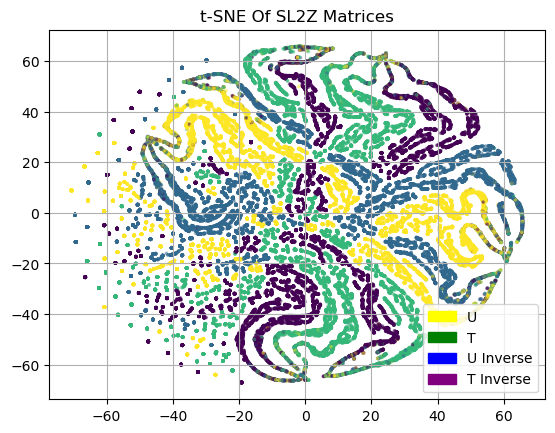

tensor(3., dtype=torch.float64)


In [12]:
plt.scatter(tsne_out[:,0], tsne_out[:,1], c=labels_train, cmap='viridis', s=3, alpha=.4)
plt.title('t-SNE Of SL2Z Matrices')
plt.legend(handles=[mpatches.Patch(color='yellow', label='U'),
                    mpatches.Patch(color='Green', label='T'),
                    mpatches.Patch(color='Blue', label='U Inverse'),
                    mpatches.Patch(color='Purple', label='T Inverse')])
plt.grid(True)
plt.show()
print(labels_train[0])